# Seattle Library Checkouts Project
**Author: Grace Finlayson**

## Purpose

The purpose of this jupyter notebook is to analyze just under 5 years of checkout data available from the Seattle library. Some goals are to understand client patterns by considering which genres, authors, and types of books are most popular, as well as study which other products offered by the library such as movies and CDs are popular. This information can be used by administrators to decide which types of products the library should buy more of, and which may be underutilized.

This project will be my first contribution to a data analysis portfolio in the hopes of eventually transitioning into a career in data science.

### Main Questions

1. How many checkouts occured each year?
2. Which months have the most checkouts?
3. What are the most popular types of items (CD, book, etc.) checked out?
4. Who are the top authors at the library?
5. (WIP) Which categories of books are the most popular at the library?
6. (ToDo) Have the most popular types of items checked out changed over time? Ex: ebooks vs physical books

## Import Data and Packages

**Warning:** It may take a minute to import the csv files due to their large size.

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import squarify

In [2]:
#Read csv files downloaded from kaggle
datatype_dict={'UsageClass': 'string', 'MaterialType': 'string', 'CheckoutYear': 'int64', 'CheckoutMonth': 'int64', 'Checkouts': 'int64', 'Title': 'string', 'ISBN': 'string', 'Creator': 'string', 'Subjects': 'string'}

checkouts_2020 = pd.read_csv('kaggle_files/Checkouts_by_Title_2020.csv', dtype = datatype_dict)
checkouts_2021 = pd.read_csv('kaggle_files/Checkouts_by_Title_2021.csv', dtype = datatype_dict)
checkouts_2022 = pd.read_csv('kaggle_files/Checkouts_by_Title_2022.csv', dtype = datatype_dict)
checkouts_2023 = pd.read_csv('kaggle_files/Checkouts_by_Title_2023.csv', dtype = datatype_dict)
checkouts_2024 = pd.read_csv('kaggle_files/Checkouts_by_Title_2024.csv', dtype = datatype_dict)

In [3]:
#Combine datafiles into one large file
checkouts = pd.concat([checkouts_2020, checkouts_2021, checkouts_2022, checkouts_2023, checkouts_2024], ignore_index=True)
checkouts.head()

,UsageClass,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects
0,Physical,BOOK,2020,8,1,Harvest / Sam Inglis.,<NA>,"Inglis, Sam",Young Neil 1945 Harvest
1,Digital,EBOOK,2020,8,1,The Race Beat,<NA>,Gene Roberts,"History, Nonfiction, Politics, Sociology"
2,Digital,EBOOK,2020,8,5,I Can Cook Vegan,<NA>,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction"
3,Digital,EBOOK,2020,8,1,Follow the Stars Home,<NA>,Luanne Rice,"Fiction, Romance"
4,Digital,EBOOK,2020,8,1,Blood of Innocence,<NA>,Tami Dane,"Fantasy, Fiction, Romance"


## 1. How Many Checkouts Ocurred Each Year?

Given that we only have part of the year for 2024, we will also project the number of books checked out in 2024, assuming books will continue to be checked out at the same rate as from Jan-Aug.

In [4]:
#Create a dataframe checkouts_per_year which counts the checkouts per year and projects the checkouts for 2024
checkouts_per_year = checkouts[['CheckoutYear','Title']].groupby(by='CheckoutYear', as_index=False).count().rename(columns={'Title':'CheckoutCount'})
checkouts_per_year["ProjectedCheckoutCount"]= 0
checkouts_per_year.loc[checkouts_per_year['CheckoutYear'] == 2024, 'ProjectedCheckoutCount'] = int(1.5*(checkouts_per_year.loc[checkouts_per_year['CheckoutYear'] == 2024, 'CheckoutCount']).iloc[0])

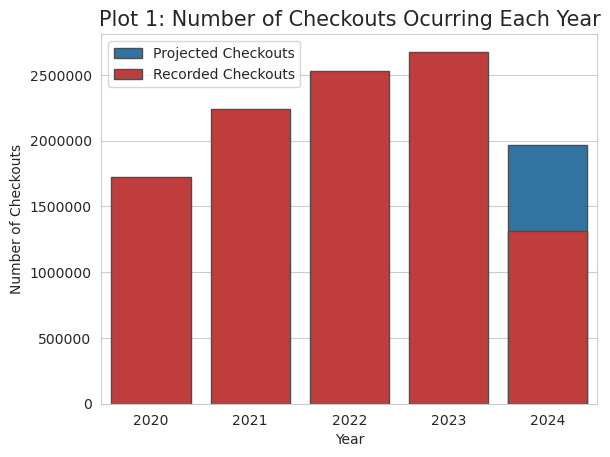

<Figure size 640x480 with 0 Axes>

In [5]:
#Set plot styles for the notebook
palette = sns.color_palette(palette='tab10', n_colors=10)
sns.set_style("whitegrid")

#Plot Data
sns.barplot(data = checkouts_per_year, x = 'CheckoutYear', y = 'ProjectedCheckoutCount', label = 'Projected Checkouts', color = palette[0], edgecolor=".3")
sns.barplot(data = checkouts_per_year, x = 'CheckoutYear', y = 'CheckoutCount', label = 'Recorded Checkouts', color = palette[3], edgecolor='.3')
plt.title('Plot 1: Number of Checkouts Ocurring Each Year',fontsize=15, fontweight=0)
plt.xlabel('Year')
plt.ylabel('Number of Checkouts')
plt.ticklabel_format(style='plain', axis='y')

plt.show()
plt.clf()

### Comments

The trend from 2020-2023 has been a consistent increase in the number of items checked out from the Seattle library system, with a marked dropoff in 2024 if patrons continue to check books out at the same rate they have from Jan-Aug. This projection does not account for a possible uptick in book checkouts in Sep-Dec, which we will investigate in the next question.

## 2. Which Months Have the Most Checkouts?

Does the month of the year affect how many items are checked out from the library, particularly in relation to the school year? Could this affect our prediction for if patrons will check out books in 2024 as often as they did in previous years?

For this question we will only consider data from 2020-2023 so that we have a consistent sample for Jan-Dec.

In [6]:
#Create dataframe checkouts_by_month which records the number of checkouts occuring each month from 2020-2023
checkouts_20_23 = checkouts[checkouts['CheckoutYear'] != 2024]
checkouts_by_month = checkouts_20_23[['CheckoutMonth','Title']].groupby(by='CheckoutMonth', as_index=False).count().rename(columns={'Title':'CheckoutCount'})

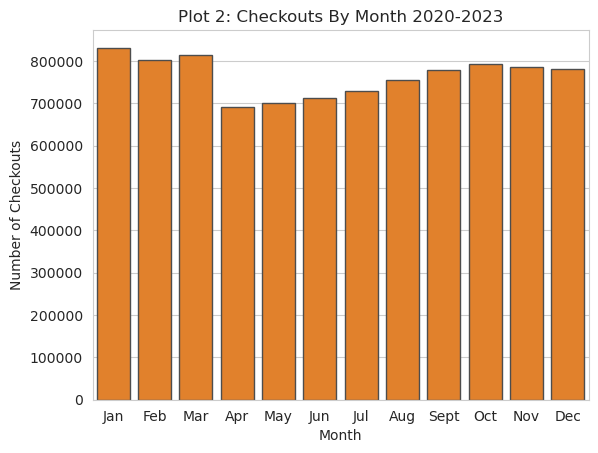

Ratio of checkouts out over the course of the year to checkouts ocurring from January through August:  1.52


<Figure size 640x480 with 0 Axes>

In [7]:
#Plot data
sns.barplot(data=checkouts_by_month, x='CheckoutMonth', y= 'CheckoutCount', color = palette[1],edgecolor='.3')
plt.title('Plot 2: Checkouts By Month 2020-2023')
plt.ylabel('Number of Checkouts')
plt.xlabel('Month')
ax = plt.gca()
ax.set_xticks(range(0,12))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()
plt.clf()

#Calculate the ratio of total checkouts in a year to the checkouts which occur from Jan-Aug
total_checkout_ratio = checkouts_20_23['Title'].count()/checkouts_20_23[checkouts_20_23['CheckoutMonth'].isin(range(1,9))]['Title'].count()
print('Ratio of checkouts out over the course of the year to checkouts ocurring from January through August: ',"%.2f" % total_checkout_ratio)

### Comments

Based on our analysis above, there appears to be a dip in checkouts right at April, with a slow increase all the way until October, with a very slight dip to the end of the year. There is no obvious correlation to the school year from Sep-Jun.

In the results of question 1 we predicted the checkouts of 2024 assuming that the total number of checkouts would be 1.5 times the number of checkouts Jan-Aug (an assumption of the same behavior). This appears to be a fairly accurate assumption as the calculated ratio using data from 2020-2023 is 1.52. This indicates that there is likely a large dip in the number of checkouts which will occur over the course of 2024.

## 3. Which types of items are checked out most frequently?

In [8]:
#Print the top MaterialType categories with their count. 
print(checkouts['MaterialType'].value_counts().head(15))

MaterialType
BOOK                    3850357
EBOOK                   3668102
AUDIOBOOK               1822019
VIDEODISC                622326
SOUNDDISC                448408
REGPRINT                  28016
MUSIC                     14358
LARGEPRINT                 7223
SOUNDDISC, VIDEODISC       4121
VIDEO                      3531
ER, SOUNDREC               2183
SOUNDREC                   2124
ER                         1806
CR                         1774
MAP                        1256
Name: count, dtype: Int64


The above table counts the top material types checked out from our data. We notice that there are some values of MaterialType which include two different descriptions, such as SOUNDDISC and VIDEODISC at the same time. For two reasons we will leave these combined descriptions as different from their component parts.
1. There are very few combined material types relative to the quantity of the other popular categories like books and ebooks
2. Checking out a packaged set which includes, for example, an audiodisk directly relevant to the content of a book is a significantly different action than checking out a separate book and audiodisk, and this difference should be measured.

In [9]:
#Create dataframe material_counts which counts how many checkouts were in each MaterialType
material_counts = checkouts[['MaterialType','Title']].groupby(by='MaterialType', as_index=False).count().rename(columns={'Title':'ItemCount'})

##Reduce material_counts to the top 5 categories by size putting everything else in OTHER
material_counts.sort_values(by='ItemCount',ascending=False, inplace=True, ignore_index=True)
material_counts.loc[5:, 'MaterialType']='OTHER'
material_counts = material_counts.groupby(by='MaterialType', as_index=False).sum()
material_counts.sort_values(by='ItemCount',ascending=False, inplace=True, ignore_index=True)

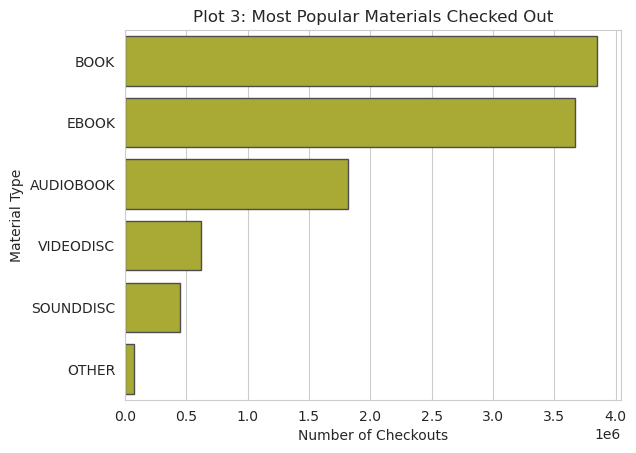

<Figure size 640x480 with 0 Axes>

In [10]:
#Plot data
sns.barplot(material_counts, y='MaterialType',x='ItemCount', color= palette[8],edgecolor='.3')
plt.xlabel('Number of Checkouts')
plt.ylabel('Material Type')
plt.title('Plot 3: Most Popular Materials Checked Out')
plt.show()
plt.clf()

### Comments

Books in all their forms, print, ebook, and audiobook, are clearly the most popular items in the library system by a vast majority. Physical video and music disks such as movies and music albums are the closest runner up categories to books with all other categories being far behind. 

While the library may like to have a diversity of offerings for all of their customers, clients clearly prioritize books as their most important product and the library should continue to focus on that as their most important offering. They may also need to undertake a publicity campaign to promote their other products if they wish to see their popularity increase.

## 4. Who are the top authors at the library?

Given our previous analysis indicating the great popularity of ebooks, audiobooks, and physical books, we will only focus on authorship for those three categories.

In [11]:
#Create the dataframe checkouts_books which only saves the checkouts for the MaterialType BOOK, EBOOK and AUDIOBOOK
checkouts_books = checkouts.loc[(checkouts['MaterialType'] == 'BOOK') | (checkouts['MaterialType'] == 'EBOOK') | (checkouts['MaterialType']=='AUDIOBOOK')]

In [12]:
#Create dataframe top_author_ranking which ranks the top 10 authors by number of checkouts
#Create top_authors which is a list of the top 10 authors by number of checkouts
top_author_ranking = checkouts_books[['Creator','Title']].groupby(by='Creator', as_index=False).count().rename(columns={'Title':'CheckoutCount'}).sort_values(by='CheckoutCount',ascending=False, ignore_index=True)['Creator'][0:10]
top_authors=top_author_ranking.to_list()

##TODO: make the printout of this ranking prettier
print(top_author_ranking)

0             James Patterson
1             Agatha Christie
2           Mary Pope Osborne
3                Stephen King
4                 Erin Hunter
5    Gertrude Chandler Warner
6                Nora Roberts
7            Geronimo Stilton
8                M. C. Beaton
9                Stuart Woods
Name: Creator, dtype: string


In [13]:
#Create top_author_checkouts a dataframe of checkout data of only the top 10 authors. 
top_author_checkouts = checkouts.dropna(subset=['Creator'],ignore_index=True)
top_author_checkouts = top_author_checkouts[top_author_checkouts['Creator'].isin(top_authors)]

In [14]:
#Create top_author_checkouts_by_date a dataframe counting the number of checkouts per month for each of the top 10 authors
top_author_checkouts_by_date = top_author_checkouts[['Creator','CheckoutYear','CheckoutMonth','Title']].groupby(by=['Creator','CheckoutYear','CheckoutMonth'], as_index=False).count().rename(columns={'Title':'CheckoutCount'})
top_author_checkouts_by_date['Dummy_Day']=1
top_author_checkouts_by_date['CheckoutDate']= pd.to_datetime({'year':top_author_checkouts_by_date['CheckoutYear'],'month':top_author_checkouts_by_date['CheckoutMonth'],'day':top_author_checkouts_by_date['Dummy_Day']})

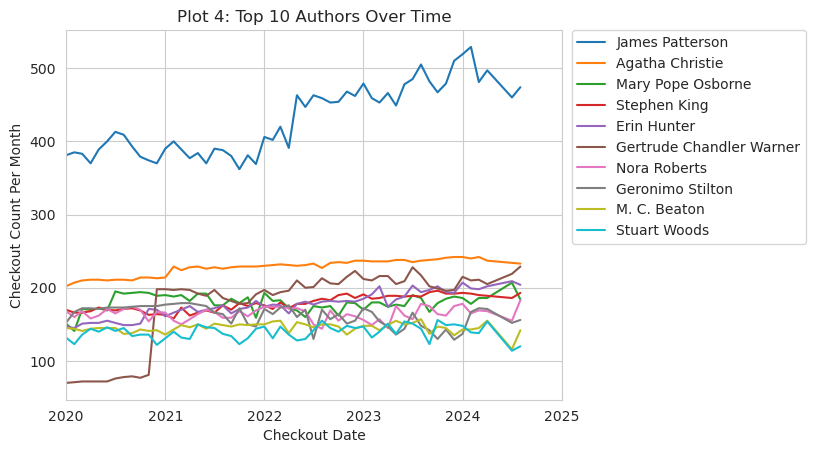

<Figure size 640x480 with 0 Axes>

In [15]:
#Plot data
sns.lineplot(data=top_author_checkouts_by_date, x='CheckoutDate',y='CheckoutCount',hue='Creator', palette = sns.color_palette(palette='tab10'), hue_order=top_authors)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

##TODO: Make it so the legend displays the ranking of the author

#set x axis ticks
ax=plt.gca()
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2025, 1, 1)
ax.set_xlim(start_date, end_date)
ax.set_xticks([start_date, datetime.datetime(2021, 1, 1), datetime.datetime(2022, 1, 1), datetime.datetime(2023, 1, 1), datetime.datetime(2024, 1, 1),end_date])
ax.set_xticklabels(['2020','2021','2022','2023','2024','2025'])

plt.title('Plot 4: Top 10 Authors Over Time')
plt.ylabel('Checkout Count Per Month')
plt.xlabel('Checkout Date')
plt.show()
plt.clf()

### Comments
The top ten authors at the library from 2020-2024 have hundreds of checkouts of their books each month. James Patterson is by far the top author, while most of the other top authors have similar checkout rates. Most of the checkout rates for the authors appear to be consistent over time, with the exception of James Patterson and Gertrude Chandler Warner. Gertrude Chandler Warner experienced a sharp uptick towards the end of 2020, which is hard to explain given that most of her books were published decades ago. It is possibe that a large collection of her books arrived in the library system around that time, or there was a school assignment involving her books. James Patterson has also experienced an increase in readership over the time studied, with a jump around early 2022.

## 5. WIP Which categories of books are the most popular?

Most of the books in the library are listed as having multiple subjects, some having 5 or more. We want to consider which of these combined subjects are popular as some pairs may be particularly popular together (ex: Fiction and Literature). However, we also want to consider individual subjects which are popular but may not appear to be as they are combined with multiple other subjects (ex: Fantasy and Juvenile Fiction, Fantasy and Fiction etc.).

We will create one plot showing the top 20 combined subjects, and a plot showing the top 20 individual subjects.

In order to reduce computing time, we will break down the top 50 combined subjects into their component parts and consider which of these individual subjects are the most popular.

TODO: sort out the dataframes to make the separation between compound and individual subjects clearer

In [16]:
#Create a dataframe called top_compound_subjects listing the top 50 compound subjects and how often they occur
top_compound_subjects = checkouts_books[['Subjects','Title']].groupby(by=['Subjects'],as_index=False).count().rename(columns={'Title':'CheckoutCount'}).sort_values(by='CheckoutCount',ascending=False, ignore_index=True)[0:50]
#Split the compound subjects into lists of their component parts for analysis
top_compound_subjects['Subjects'] = top_compound_subjects['Subjects'].str.split(', ')

In [17]:
##TODO: consider how to do this in a vectorized way

#Create a dictionary which will count the occurences of the most common component categories
separated_categories_dict = {}

for index, row in top_compound_subjects.iterrows():
    subject_list = row['Subjects']
    for element in subject_list:
        if element in separated_categories_dict:
            separated_categories_dict[element]+=row['CheckoutCount']
        else:
            separated_categories_dict[element] = row['CheckoutCount']
            

In [37]:
#Convert dictionary with most common subjects to a dataframe which can be more easily manipulated
top_subjects = pd.DataFrame.from_dict(separated_categories_dict, orient='index',columns = ['Checkout Count'])
top_subjects.reset_index(level=0, inplace=True)
top_subjects = top_subjects.rename(columns = {'index':'Individual Subject'})
top_subjects.sort_values(by='Checkout Count',ascending=False,inplace=True, ignore_index=True)

In [38]:
top_subjects

,Subject,Checkout Count
0,Fiction,1704888
1,Literature,716402
2,Mystery,521119
3,Juvenile Fiction,419091
4,Romance,405751
5,Thriller,355703
6,Nonfiction,347175
7,Juvenile Literature,332378
8,Historical Fiction,270413
9,Suspense,245276


As we can see from the above table, the top 50 compound subjects result in 26 individual subjects whose counts are combined together.

In [39]:
#Plot top 20 broken down subjects from the top 50 compound subjects
sns.barplot(top_subjects[0:20], y='Individual Subject',x='Checkout Count', color= palette[8],edgecolor='.3')
plt.xlabel('Number of Checkouts')
plt.ylabel('Subject')
plt.title('Plot 5: Most Popular Individual Subjects of Books, Ebooks, and Audiobooks Checked Out')
plt.show()
plt.clf()

ValueError: Could not interpret value `Individual Subject` for `y`. An entry with this name does not appear in `data`.

In [ ]:
sns.barplot(top_compound_subjects[0:20], y='Subject',x='Checkout Count', color= palette[8],edgecolor='.3')
plt.xlabel('Number of Checkouts')
plt.ylabel('Subject')
plt.title('Plot 5: Most Popular Individual Subjects of Books, Ebooks, and Audiobooks Checked Out')
plt.show()
plt.clf()